<a href="https://colab.research.google.com/github/franciscomazali/collab-notebooks/blob/main/ComfyUI-Colab-Alchemist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

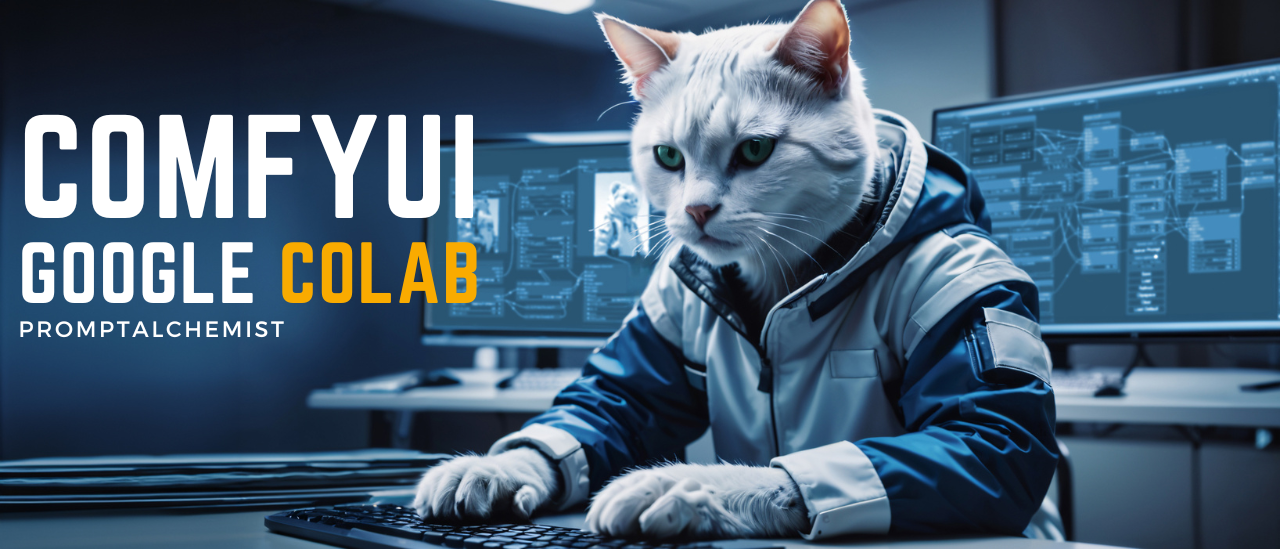

##Prompt Alchemist’s ComfyUI Colab
📢 พบปัญหาการใช้งาน กรุณาแจ้งมาที่ [Facebook/promptalchemist](https://www.facebook.com/PromptAlchemist)


📝 สมัคร [Google Colab Pro](https://colab.research.google.com/signup)

>ราคา 343฿ ต่อเดือน ได้รับ 100 computing units

>การใช้งาน Nvidia T4 16GB VRAM ประมาณ 1.67 units/hr = ชั่วโมงละ 5.73฿

>การใช้งาน Nvidia L4 24GB VRAM ประมาณ 2.4 units/hr = ชั่วโมงละ 8.23฿

📃 [คู่มือการใช้งาน](https://www.alchemistskill.com/how-to-use-comfyui-on-google-colab) | [Manual](https://www.alchemistskill.com/comfyui-google-colab-tutorial-generate-ai-images-without-a-graphics-card/)

📹 วีดีโอสอนการใช้งาน - [คลิกที่นี่](https://www.youtube.com/watch?v=PmECbd0AMBc/)

Installed Custom nodes:

>| ComfyUI Manager | ComfyUI Essentials | ComfyUI Inspire Pack |

>| Comfyui Controlnet Aux | DZ-FaceDetailer | ComfyUI IPAdapter Plus |

>| ComfyUI UltimateSDUpscale | Comfyui Inpaint Nodes | ComfyUI KJNodes |

>| ComfyUI GGUF | rgthree-comfy | ComfyUI Custom Nodes AlekPet |


ไฟล์ภาพจะถูกเซฟไว้ที่ Google Drive MyDrive/ComfyUI_output

**ถ้าต้องการใช้ Models จาก Google Drive ให้สร้างโฟเดอร์**

>"**Lora**", "**Checkpoint**", "**Unet**"


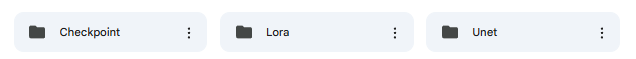

Generative AI for Graphic Design รุ่นที่ 10 👉 https://www.skooldio.com/workshops/ai-art-graphic-design

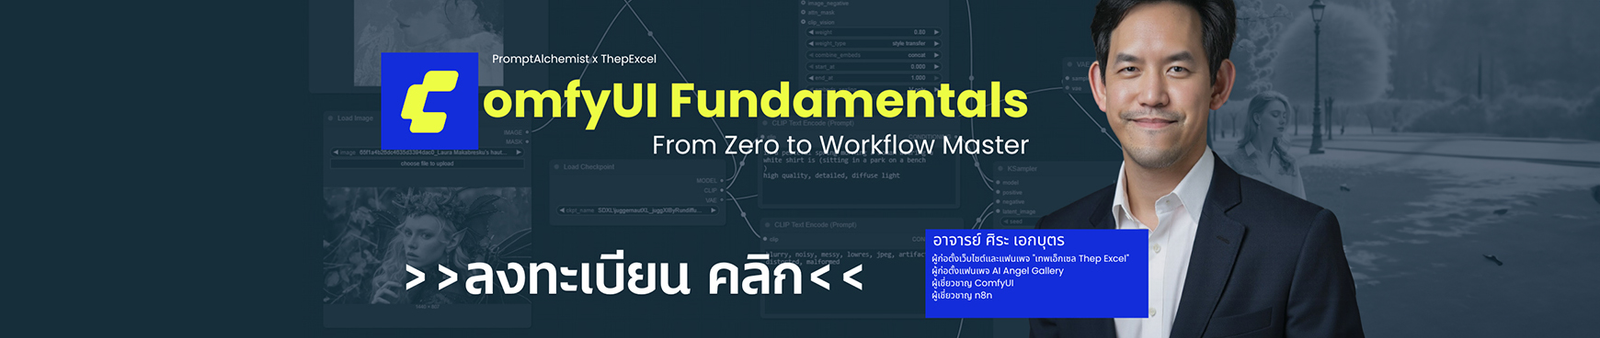

ComfyUI Fundamentals: From Zero to Workflow Master 👉 https://course.alchemistskill.com/p/comfyui-fundamentals

In [ ]:
#@markdown #1. 📦 Install ComfyUI | Models | Custom nodes ⚙️
from IPython.display import clear_output
from IPython.display import Javascript
import ipywidgets as widgets
from google.colab import drive
import os
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))
def inf(msg, style, wdth): inf = widgets.Button(description=msg, disabled=True, button_style=style, layout=widgets.Layout(min_width=wdth));display(inf)

%cd /content
drive.mount('/content/drive')

output_directory = "/content/drive/MyDrive/ComfyUI_output"
# Check if the directory already exists
if not os.path.exists(output_directory):
    # Create the directory if it doesn't exist
    os.makedirs(output_directory, exist_ok=True)
    print(f"Directory '{output_directory}' created successfully.")
else:
    print(f"Directory '{output_directory}' already exists.")


#ติดตั้ง comfy
!git clone https://github.com/comfyanonymous/ComfyUI

#comfyUI setting
%cd ComfyUI
!mkdir user
%cd user
!mkdir default
%cd default
!wget https://raw.githubusercontent.com/poomshift/ComfyUI-Colab-Alchemist/main/comfy.settings.json

#ติดตั้ง Dependencies
%cd /content/ComfyUI
!apt -y install -qq aria2
!uv pip install xformers!=0.0.18 -r requirements.txt  --extra-index-url https://download.pytorch.org/whl/cu128
!uv pip install SageAttention
!uv pip install triton

#cloudflare tunnel
!wget https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb
!dpkg -i cloudflared-linux-amd64.deb

#Checkpoints
%cd /content/ComfyUI/models/checkpoints

!aria2c --console-log-level=error -c -x 8 -s 8 -k 1M -c https://huggingface.co/uwg/upscaler/resolve/main/ESRGAN/8x_NMKD-Superscale_150000_G.pth -d /content/ComfyUI/models/upscale_models -o 8x_NMKD-Superscale_150000_G.pth
!aria2c --console-log-level=error -c -x 8 -s 8 -k 1M -c https://huggingface.co/gemasai/4x_NMKD-Siax_200k/resolve/main/4x_NMKD-Siax_200k.pth -d /content/ComfyUI/models/upscale_models -o 4x_NMKD-Siax_200k.pth

!aria2c --console-log-level=error -c -x 8 -s 8 -k 1M -c https://huggingface.co/Patarapoom/model/resolve/main/ae.safetensors -d /content/ComfyUI/models/vae -o ae.safetensors
!aria2c --console-log-level=error -c -x 8 -s 8 -k 1M -c https://huggingface.co/comfyanonymous/flux_text_encoders/resolve/main/clip_l.safetensors -d /content/ComfyUI/models/text_encoders -o clip_l.safetensors
!aria2c --console-log-level=error -c -x 8 -s 8 -k 1M -c https://huggingface.co/comfyanonymous/flux_text_encoders/resolve/main/t5xxl_fp8_e4m3fn.safetensors -d /content/ComfyUI/models/text_encoders -o t5xxl_fp8_e4m3fn.safetensors

#flux redux
!aria2c --console-log-level=error -c -x 8 -s 8 -k 1M https://huggingface.co/Comfy-Org/sigclip_vision_384/resolve/main/sigclip_vision_patch14_384.safetensors -d /content/ComfyUI/models/clip_vision -o sigclip_vision_patch14_384.safetensors
!aria2c --console-log-level=error -c -x 8 -s 8 -k 1M https://huggingface.co/Patarapoom/model/resolve/main/flux1-redux-dev.safetensors -d /content/ComfyUI/models/style_models -o flux1-redux-dev.safetensors

#@markdown Checkpoints Selection
# Model configurations - Easy to add new models here
MODEL_CONFIGS = {
    "Qwen Image, Qwen Edit Image (GGUF), 4steps LoRA, Controlnet": {
        "files": [
            {
                "url": "https://huggingface.co/city96/Qwen-Image-gguf/resolve/main/qwen-image-Q5_0.gguf",
                "dir": "unet",
                "filename": "qwen-image-Q5_0.gguf"
            },
            {
                "url": "https://huggingface.co/QuantStack/Qwen-Image-Edit-GGUF/resolve/main/Qwen_Image_Edit-Q5_0.gguf",
                "dir": "unet",
                "filename": "Qwen_Image_Edit-Q5_0.gguf"
            },
            {
                "url": "https://huggingface.co/Comfy-Org/Qwen-Image-DiffSynth-ControlNets/resolve/main/split_files/loras/qwen_image_union_diffsynth_lora.safetensors",
                "dir": "loras",
                "filename": "qwen_image_union_diffsynth_lora.safetensors"
            },
            {
                "url": "https://huggingface.co/lightx2v/Qwen-Image-Lightning/resolve/main/Qwen-Image-Lightning-4steps-V1.0.safetensors",
                "dir": "loras",
                "filename": "Qwen-Image-Lightning-4steps-V1.0.safetensors"
            },
            {
                "url": "https://huggingface.co/Comfy-Org/Qwen-Image_ComfyUI/resolve/main/split_files/text_encoders/qwen_2.5_vl_7b_fp8_scaled.safetensors",
                "dir": "text_encoders",
                "filename": "qwen_2.5_vl_7b_fp8_scaled.safetensors"
            },
            {
                "url": "https://huggingface.co/Comfy-Org/Qwen-Image_ComfyUI/resolve/main/split_files/vae/qwen_image_vae.safetensors",
                "dir": "vae",
                "filename": "qwen_image_vae.safetensors"
            }
        ]
    },
    "PonyDiffusion V6 XL": {
        "url": "https://huggingface.co/Magamanny/Pony-Diffusion-V6-XL/resolve/main/ponyDiffusionV6XL_v6StartWithThisOne.safetensors",
        "dir": "checkpoints",
        "filename": "PonyDiffusionV6XL.safetensors"
    },
    "WAI NSFW illustrious SDXL": {
        "url": "https://civitai.com/api/download/models/1410435",
        "dir": "checkpoints",
        "filename": None  # Let Civitai set the filename
    },
    "Juggernaut XL": {
        "url": "https://huggingface.co/Patarapoom/model/resolve/main/juggernautXL_juggXIByRundiffusion.safetensors",
        "dir": "checkpoints",
        "filename": "juggernautXL.safetensors"
    },
    "Flux1 Dev Fp8": {
        "url": "https://huggingface.co/Kijai/flux-fp8/resolve/main/flux1-dev-fp8.safetensors",
        "dir": "unet",
        "filename": "flux1-dev-fp8.safetensors"
    },
    "SD3.5 Large Turbo Q5 GGUF": {
        "files": [
            {
                "url": "https://huggingface.co/city96/stable-diffusion-3.5-large-turbo-gguf/resolve/main/sd3.5_large_turbo-Q5_0.gguf",
                "dir": "unet",
                "filename": "sd3.5_large_turbo-Q5_0.gguf"
            },
            {
                "url": "https://huggingface.co/calcuis/sd3.5-large-gguf/resolve/main/clip_g.safetensors",
                "dir": "clip",
                "filename": "clip_g.safetensors"
            },
            {
                "url": "https://huggingface.co/calcuis/sd3.5-large-gguf/resolve/main/diffusion_pytorch_model.safetensors",
                "dir": "vae",
                "filename": "SD3.5_vae.safetensors"
            }
        ]
    }
}


# Create the dropdowns
Model_1 = "Qwen Image, Qwen Edit Image (GGUF), 4steps LoRA, Controlnet" #@param ["None", "Qwen Image, Qwen Edit Image (GGUF), 4steps LoRA, Controlnet", "PonyDiffusion V6 XL", "WAI NSFW illustrious SDXL", "Juggernaut XL", "Flux1 Dev Fp8", "SD3.5 Large Turbo Q5 GGUF"]
Model_2 = "Flux1 Dev Fp8" #@param ["None", "Qwen Image, Qwen Edit Image (GGUF), 4steps LoRA, Controlnet", "PonyDiffusion V6 XL", "WAI NSFW illustrious SDXL", "Juggernaut XL", "Flux1 Dev Fp8",  "SD3.5 Large Turbo Q5 GGUF"]
Model_3 = "None" #@param ["None", "Qwen Image, Qwen Edit Image (GGUF), 4steps LoRA, Controlnet", "PonyDiffusion V6 XL", "WAI NSFW illustrious SDXL", "Juggernaut XL", "Flux1 Dev Fp8", "SD3.5 Large Turbo Q5 GGUF"]

# Create directories
os.makedirs("/content/ComfyUI/models/unet", exist_ok=True)
os.makedirs("/content/ComfyUI/models/clip", exist_ok=True)
os.makedirs("/content/ComfyUI/models/vae", exist_ok=True)
os.makedirs("/content/ComfyUI/models/checkpoints", exist_ok=True)

def download_file(url, base_dir, filename=None):
    """Download a single file using aria2c"""
    output_dir = f"/content/ComfyUI/models/{base_dir}"
    filename_param = f"-o {filename}" if filename else ""
    command = f'aria2c --console-log-level=error -c -x 8 -s 8 -k 1M "{url}" -d "{output_dir}" {filename_param}'
    !{command}

def download_model(model_name):
    """Download model based on configuration"""
    if model_name == "None":
        return

    print(f"\nDownloading {model_name}...")
    config = MODEL_CONFIGS.get(model_name)

    if not config:
        print(f"Error: Configuration not found for {model_name}")
        return

    if "files" in config:  # Multiple files (like SD3.5)
        for file_config in config["files"]:
            download_file(file_config["url"], file_config["dir"], file_config["filename"])
    else:  # Single file
        download_file(config["url"], config["dir"], config.get("filename"))

print("Starting downloads...")

# Process selected models
for model_choice in [Model_1, Model_2, Model_3]:
    download_model(model_choice)

print("\nDownload process completed!")

#@markdown ETC

SDXL_Controlnet_union = False # @param {type:"boolean"}
if SDXL_Controlnet_union == True:
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M -c https://huggingface.co/xinsir/controlnet-union-sdxl-1.0/resolve/main/diffusion_pytorch_model.safetensors -d /content/ComfyUI/models/controlnet -o controlnet-union-sdxl.safetensors
else:
  ()

Flux_Controlnet_union_Pro = False # @param {type:"boolean"}
if Flux_Controlnet_union_Pro == True:
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M -c https://huggingface.co/Shakker-Labs/FLUX.1-dev-ControlNet-Union-Pro-2.0/resolve/main/diffusion_pytorch_model.safetensors -d /content/ComfyUI/models/controlnet -o Shakker-Labs_FLUX.1-dev-ControlNet-Union-Pro-2-0.safetensors
else:
  ()

Flux_kontext_fp8 = False # @param {type:"boolean"}
if Flux_kontext_fp8 == True:
  !aria2c --console-log-level=error -c -x 8 -s 8 -k 1M -c https://huggingface.co/Comfy-Org/flux1-kontext-dev_ComfyUI/resolve/main/split_files/diffusion_models/flux1-dev-kontext_fp8_scaled.safetensors -d /content/ComfyUI/models/diffusion_models -o flux1-dev-kontext_fp8_scaled.safetensors

else:
  ()

Ipadapter_SDXL = False # @param {type:"boolean"}

if Ipadapter_SDXL:
    %cd /content/ComfyUI/models
    !mkdir ipadapter
    !aria2c --console-log-level=error -c -x 8 -s 8 -k 1M \
    https://huggingface.co/h94/IP-Adapter/resolve/main/models/image_encoder/model.safetensors \
    -d /content/ComfyUI/models/clip_vision \
    -o CLIP-ViT-H-14-laion2B-s32B-b79K.safetensors

    !aria2c --console-log-level=error -c -x 8 -s 8 -k 1M \
    https://huggingface.co/h94/IP-Adapter/resolve/main/sdxl_models/ip-adapter_sdxl_vit-h.safetensors \
    -d /content/ComfyUI/models/ipadapter \
    -o ip-adapter_sdxl_vit-h.safetensors

    !aria2c --console-log-level=error -c -x 8 -s 8 -k 1M \
    https://huggingface.co/h94/IP-Adapter/resolve/main/sdxl_models/ip-adapter-plus_sdxl_vit-h.safetensors \
    -d /content/ComfyUI/models/ipadapter \
    -o ip-adapter-plus_sdxl_vit-h.safetensors

    # !aria2c --console-log-level=error -c -x 8 -s 8 -k 1M \
    # https://huggingface.co/h94/IP-Adapter/resolve/main/sdxl_models/ip-adapter-plus-face_sdxl_vit-h.safetensors \
    # -d /content/ComfyUI/models/ipadapter \
    # -o ip-adapter-plus-face_sdxl_vit-h.safetensors

    !aria2c --console-log-level=error -c -x 8 -s 8 -k 1M \
    https://huggingface.co/h94/IP-Adapter/resolve/main/sdxl_models/ip-adapter_sdxl.safetensors \
    -d /content/ComfyUI/models/ipadapter \
    -o ip-adapter_sdxl.safetensors
else:
    print("Ipadapter_SDXL download skipped.")


# Hunyuan_video_With_FramePack  = False # @param {type:"boolean"}
# if Hunyuan_video_With_FramePack == True:
#   !aria2c --console-log-level=error -c -x 8 -s 8 -k 1M -c https://huggingface.co/Kijai/HunyuanVideo_comfy/resolve/main/hunyuan_video_720_cfgdistill_fp8_e4m3fn.safetensors -d /content/ComfyUI/models/diffusion_models -o hunyuan_video_720_cfgdistill_fp8_e4m3fn.safetensors
#   !aria2c --console-log-level=error -c -x 8 -s 8 -k 1M -c https://huggingface.co/Kijai/HunyuanVideo_comfy/resolve/main/FramePackI2V_HY_fp8_e4m3fn.safetensors -d /content/ComfyUI/models/diffusion_models -o FramePackI2V_HY_fp8_e4m3fn.safetensors
#   !aria2c --console-log-level=error -c -x 8 -s 8 -k 1M -c https://huggingface.co/Kijai/HunyuanVideo_comfy/resolve/main/hunyuan_video_vae_bf16.safetensors -d /content/ComfyUI/models/vae -o hunyuan_video_vae_bf16.safetensors
#   !aria2c --console-log-level=error -c -x 8 -s 8 -k 1M -c https://huggingface.co/calcuis/hunyuan-gguf/resolve/main/clip_l.safetensors -d /content/ComfyUI/models/text_encoders -o clip_l.safetensors
#   !aria2c --console-log-level=error -c -x 8 -s 8 -k 1M -c https://huggingface.co/calcuis/hunyuan-gguf/resolve/main/llava_llama3_fp8_scaled.safetensors -d /content/ComfyUI/models/text_encoders -o llava_llama3_fp8_scaled.safetensors
#   !aria2c --console-log-level=error -c -x 8 -s 8 -k 1M -c https://huggingface.co/Kijai/HunyuanVideo_comfy/resolve/main/hyvideo_FastVideo_LoRA-fp8.safetensors -d /content/ComfyUI/models/loras -o hyvideo_FastVideo_LoRA-fp8.safetensors
#   #!aria2c --console-log-level=error -c -x 8 -s 8 -k 1M -c https://huggingface.co/Kijai/Leapfusion-image2vid-comfy/resolve/main/leapfusion_img2vid544p_comfy.safetensors -d /content/ComfyUI/models/loras -o leapfusion_img2vid544p_comfy.safetensors

# else:
#   ()


Flux_Fill_Dev_fp8 = False # @param {type:"boolean"}
if Flux_Fill_Dev_fp8 == True:
  !aria2c --console-log-level=error -c -x 8 -s 8 -k 1M https://huggingface.co/Patarapoom/model/resolve/main/flux1FillDevFp8_v10.safetensors -d /content/ComfyUI/models/unet/ -o flux1FillDevFp8_v10.safetensors
else:
  ()



#@markdown Custom Nodes (e.g., https://github.com/ltdrdata/ComfyUI-Inspire-Pack)
custom_node_1 = '' #@param {type: "string"}
custom_node_2 = '' #@param {type: "string"}
custom_node_3 = '' #@param {type: "string"}





%cd /content/ComfyUI/custom_nodes
!git clone https://github.com/ltdrdata/ComfyUI-Manager.git
#git clone https://github.com/ltdrdata/ComfyUI-Impact-Pack
!git clone https://github.com/cubiq/ComfyUI_essentials
!git clone https://github.com/ltdrdata/ComfyUI-Inspire-Pack
!git clone https://github.com/Fannovel16/comfyui_controlnet_aux
!git clone https://github.com/nicofdga/DZ-FaceDetailer
!git clone https://github.com/cubiq/ComfyUI_IPAdapter_plus
!git clone https://github.com/ssitu/ComfyUI_UltimateSDUpscale --recursive
# !git clone https://github.com/kijai/ComfyUI-LivePortraitKJ
#git clone https://github.com/Kosinkadink/ComfyUI-VideoHelperSuite
!git clone https://github.com/Acly/comfyui-inpaint-nodes
!git clone https://github.com/kijai/ComfyUI-KJNodes
!git clone https://github.com/city96/ComfyUI-GGUF
!git clone https://github.com/rgthree/rgthree-comfy
!git clone https://github.com/AlekPet/ComfyUI_Custom_Nodes_AlekPet
#git clone https://github.com/Fannovel16/ComfyUI-Frame-Interpolation
#git clone https://github.com/kijai/ComfyUI-HunyuanVideoWrapper
#git clone https://github.com/facok/ComfyUI-TeaCacheHunyuanVideo
#git clone https://github.com/CY-CHENYUE/ComfyUI-Gemini-API
#git clone https://github.com/QijiTec/ComfyUI-RED-UNO
#git clone https://github.com/kijai/ComfyUI-WanVideoWrapper
#git clone https://github.com/kijai/ComfyUI-FramePackWrapper
#git clone https://github.com/yuvraj108c/ComfyUI-FLOAT
#git clone https://github.com/neverbiasu/ComfyUI-BAGEL


# Install custom nodes
def install_node(url):
    if url:
        !git clone $url

install_node(custom_node_1)
install_node(custom_node_2)
install_node(custom_node_3)


%cd /content/ComfyUI/custom_nodes/ComfyUI-GGUF
!uv pip install -r requirements.txt

%cd /content/ComfyUI/custom_nodes/ComfyUI-KJNodes
!uv pip install -r requirements.txt




# Download Inpaint models
%cd /content/ComfyUI/models
!mkdir inpaint

# !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M -c https://huggingface.co/lllyasviel/fooocus_inpaint/resolve/main/fooocus_inpaint_head.pth -d /content/ComfyUI/models/inpaint -o fooocus_inpaint_head.pth
# !aria2c --console-log-level=error -c -x 8 -s 8 -k 1M -c https://huggingface.co/lllyasviel/fooocus_inpaint/resolve/main/fooocus_lama.safetensors -d /content/ComfyUI/models/inpaint -o fooocus_lama.safetensors
# !aria2c --console-log-level=error -c -x 8 -s 8 -k 1M -c https://huggingface.co/lllyasviel/fooocus_inpaint/resolve/main/inpaint.fooocus.patch -d /content/ComfyUI/models/inpaint -o inpaint.fooocus.patch
# !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M -c https://huggingface.co/lllyasviel/fooocus_inpaint/resolve/main/inpaint_v26.fooocus.patch -d /content/ComfyUI/models/inpaint -o inpaint_v26.fooocus.patch

#LivePortraitKJ models
# !aria2c --console-log-level=error -c -x 8 -s 8 -k 1M https://huggingface.co/Kijai/LivePortrait_safetensors/resolve/main/appearance_feature_extractor.safetensors -d /content/ComfyUI/models/liveportrait -o appearance_feature_extractor.safetensors
# !aria2c --console-log-level=error -c -x 8 -s 8 -k 1M https://huggingface.co/Kijai/LivePortrait_safetensors/resolve/main/landmark.onnx -d /content/ComfyUI/models/liveportrait -o landmark.onnx
# !aria2c --console-log-level=error -c -x 8 -s 8 -k 1M https://huggingface.co/Kijai/LivePortrait_safetensors/resolve/main/landmark_model.pth -d /content/ComfyUI/models/liveportrait -o landmark_model.pth
# !aria2c --console-log-level=error -c -x 8 -s 8 -k 1M https://huggingface.co/Kijai/LivePortrait_safetensors/resolve/main/motion_extractor.safetensors -d /content/ComfyUI/models/liveportrait -o motion_extractor.safetensors
# !aria2c --console-log-level=error -c -x 8 -s 8 -k 1M https://huggingface.co/Kijai/LivePortrait_safetensors/resolve/main/spade_generator.safetensors -d /content/ComfyUI/models/liveportrait -o spade_generator.safetensors
# !aria2c --console-log-level=error -c -x 8 -s 8 -k 1M https://huggingface.co/Kijai/LivePortrait_safetensors/resolve/main/stitching_retargeting_module.safetensors -d /content/ComfyUI/models/liveportrait -o stitching_retargeting_module.safetensors
# !aria2c --console-log-level=error -c -x 8 -s 8 -k 1M https://huggingface.co/Kijai/LivePortrait_safetensors/resolve/main/warping_module.safetensors -d /content/ComfyUI/models/liveportrait -o warping_module.safetensors

# %cd /content/ComfyUI/models/ipadapter
# !aria2c --console-log-level=error -c -x 8 -s 8 -k 1M -c https://huggingface.co/h94/IP-Adapter/resolve/main/models/ip-adapter_sd15.safetensors  -o ip-adapter_sd15.safetensors
# !aria2c --console-log-level=error -c -x 8 -s 8 -k 1M -c https://huggingface.co/h94/IP-Adapter/resolve/main/models/ip-adapter_sd15_light_v11.bin  -o ip-adapter_sd15_light_v11.bin
# !aria2c --console-log-level=error -c -x 8 -s 8 -k 1M -c https://huggingface.co/h94/IP-Adapter/resolve/main/models/ip-adapter-plus_sd15.safetensors  -o ip-adapter-plus_sd15.safetensors
# !aria2c --console-log-level=error -c -x 8 -s 8 -k 1M -c https://huggingface.co/h94/IP-Adapter/resolve/main/models/ip-adapter-plus-face_sd15.safetensors  -o ip-adapter-plus-face_sd15.safetensors
# !aria2c --console-log-level=error -c -x 8 -s 8 -k 1M -c https://huggingface.co/h94/IP-Adapter/resolve/main/models/ip-adapter-full-face_sd15.safetensors  -o ip-adapter-full-face_sd15.safetensors
# !aria2c --console-log-level=error -c -x 8 -s 8 -k 1M -c https://huggingface.co/h94/IP-Adapter/resolve/main/models/ip-adapter_sd15_vit-G.safetensors  -o ip-adapter_sd15_vit-G.safetensors




# %cd /content/ComfyUI/models/loras
#aria2c --console-log-level=error -c -x 16 -s 16 -k 1M -c https://huggingface.co/bytedance-research/UNO/resolve/main/dit_lora.safetensors -o dit_lora.safetensors

!cp -av /content/drive/MyDrive/Lora/* /content/ComfyUI/models/loras/
!cp -av /content/drive/MyDrive/Checkpoint/* /content/ComfyUI/models/checkpoints/
!cp -av /content/drive/MyDrive/Unet/* /content/ComfyUI/models/unet/

%cd /content/ComfyUI


inf('\u2714 Done','success', '50px')


In [ ]:
#@markdown #2.🚀 Run ComfyUI
%cd /content/ComfyUI
import subprocess
import threading
import time
import socket
import urllib.request
from IPython.display import clear_output
from IPython.display import Javascript
import ipywidgets as widgets
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))
def inf(msg, style, wdth): inf = widgets.Button(description=msg, disabled=True, button_style=style, layout=widgets.Layout(min_width=wdth));display(inf)

def iframe_thread(port):
  while True:
      time.sleep(0.5)
      sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
      result = sock.connect_ex(('127.0.0.1', port))
      if result == 0:
        break
      sock.close()
  print("\nComfyUI finished loading, trying to launch cloudflared (if it gets stuck here cloudflared is having issues)\n")

  p = subprocess.Popen(["cloudflared", "tunnel", "--url", "http://127.0.0.1:{}".format(port)], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
  for line in p.stderr:
    l = line.decode()
    if "trycloudflare.com " in l:
      print("This is the URL to access ComfyUI:", l[l.find("http"):], end='')
      print("เข้าใช้งาน ComfyUI ที่ลิงค์นี้ >>>:", l[l.find("http"):], end='')
    #print(l, end='')


threading.Thread(target=iframe_thread, daemon=True, args=(8188,)).start()

!python main.py --dont-print-server --output-directory /content/drive/MyDrive/ComfyUI_output

#🔧Tools (Install ComfyUI first!!)

เลข Model ID จาก Civitai.com



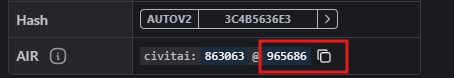

In [ ]:
from IPython.display import clear_output, Javascript
import ipywidgets as widgets
import subprocess
import os

def check_aria2c():
    """Check if aria2c is installed"""
    try:
        subprocess.run(['aria2c', '--version'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        return True
    except FileNotFoundError:
        return False

def install_aria2c():
    """Install aria2c using apt-get"""
    print("Installing aria2c...")
    !apt-get update -qq
    !apt-get install -y -qq aria2
    print("aria2c installed successfully!")

def setup_display():
    """Setup display configurations"""
    display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 200})'''))

def inf(msg, style, wdth):
    """Display info button"""
    inf = widgets.Button(
        description=msg,
        disabled=True,
        button_style=style,
        layout=widgets.Layout(min_width=wdth)
    )
    display(inf)

def download_model(api_key, model_type, model_id):
    """Download model from Civitai"""
    if not api_key.strip():
        print("Error: Please provide a Civitai API key")
        return

    if not model_id.strip():
        print("Error: Please provide a Model ID")
        return

    # Check if the models directory exists
    model_dir = f"/content/ComfyUI/models/{model_type}"
    if not os.path.exists(model_dir):
        os.makedirs(model_dir, exist_ok=True)
        print(f"Created directory: {model_dir}")

    # Construct the URL
    url = f"https://civitai.com/api/download/models/{model_id}"

    # Construct the download command
    download_command = f'aria2c --console-log-level=error -c -x 16 -s 16 -k 1M "{url}?token={api_key}" -d "{model_dir}"'

    # Execute the download command
    print("Starting download...")
    !{download_command}
    print("Download completed!")

# Main execution
setup_display()

#@markdown #🤖 Civitai downloader
#@markdown Civitai API Key From https://civitai.com/user/account
#Civitai API
Civitai_API_key = "" #@param {type:"string"}
Model_type = "checkpoints" # @param ["checkpoints", "diffusion_models" , "loras", "controlnet", "unet", "vae", "clip"]
Model_ID = "" #@param {type:"string"}

# Check and install aria2c if needed
if not check_aria2c():
    print("aria2c is not installed.")
    install_aria2c()
    if not check_aria2c():
        print("Error: Failed to install aria2c")
        exit(1)
    else:
        print("aria2c installation verified.")

# Process the download
download_model(Civitai_API_key, Model_type, Model_ID)

In [ ]:
from IPython.display import clear_output, Javascript
import ipywidgets as widgets
import subprocess
import os

def check_aria2c():
    """Check if aria2c is installed"""
    try:
        subprocess.run(['aria2c', '--version'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        return True
    except FileNotFoundError:
        return False

def install_aria2c():
    """Install aria2c using apt-get"""
    print("Installing aria2c...")
    !apt-get update -qq
    !apt-get install -y -qq aria2
    print("aria2c installed successfully!")

def setup_display():
    """Setup display configurations"""
    display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 200})'''))

def download_model(file_url, model_type):
    """Download single file from Hugging Face"""
    if not file_url.strip():
        print("Error: Please provide a file URL")
        return

    # Extract filename from URL
    filename = file_url.split('/')[-1]

    # Check if the models directory exists
    model_dir = f"/content/ComfyUI/models/{model_type}"
    if not os.path.exists(model_dir):
        os.makedirs(model_dir, exist_ok=True)
        print(f"Created directory: {model_dir}")

    # Construct the download command
    download_command = f'aria2c --console-log-level=error -c -x 8 -s 8 -k 1M "{file_url}" -d "{model_dir}" -o "{filename}"'

    # Execute the download command
    print(f"Starting download of {filename}...")
    !{download_command}
    print("Download completed!")

# Main execution
setup_display()

#@markdown # 🤗 Hugging Face File Downloader
#@markdown File URL (e.g., https://huggingface.co/Kijai/flux-fp8/resolve/main/flux1-dev-fp8.safetensors)
File_URL = "" #@param {type:"string"}
Model_Type = "checkpoints" #@param ["checkpoints", "diffusion_models" , "loras", "controlnet", "unet", "vae", "clip", "clip_vision", "text_encoder"]

# Check and install aria2c if needed
if not check_aria2c():
    print("aria2c is not installed.")
    install_aria2c()
    if not check_aria2c():
        print("Error: Failed to install aria2c")
        exit(1)
    else:
        print("aria2c installation verified.")

# Process the download
download_model(File_URL, Model_Type)